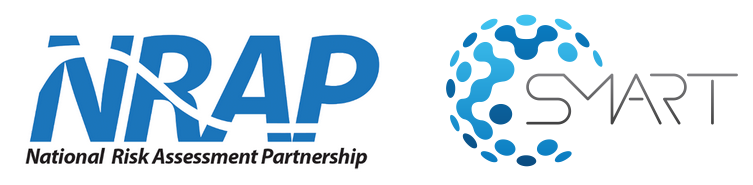

# Example 9: Editing and Running Control File of NRAP-Open-IAM in Jupyter Notebook

## Table of Contents: <a class="anchor" id="toc"></a>
1. [Import the standard and third party needed libraries.](#bullet1)

2. [Load yamlmagic package.](#bullet2)

3. [Copy content of the control file of interest and edit as necessary.](#bullet3)

4. [Check data saved in the variable cfi_yaml_data.](#bullet4)

5. [Setup folders necessary to save dictionary data into yaml file.](#bullet5)

6. [Setup folders and files needed to run the saved control file.](#bullet6)

7. [Setup code and show produced figures within the Jupyter Notebook.](#bullet7)

This example demonstrates how Jupyter Notebook can be used for editing and running control file examples of NRAP-Open-IAM. 

#### 1) Import the standard and third party needed libraries. <a class="anchor" id="bullet1"></a>
Back to [TOC](#toc).

In [ ]:
import sys
import os
import yaml
sys.path.insert(0, os.sep.join(['..', '..', 'src']))
import numpy as np

#### 2) Load yamlmagic package. <a class="anchor" id="bullet2"></a>
The package provides methods of creating python variables using yaml syntax in Jupyter Notebook cells.

Back to [TOC](#toc).

In [ ]:
%load_ext yamlmagic

#### 3) Copy content of the control file of interest (starting from line 3) and edit as necessary.  <a class="anchor" id="bullet3"></a>
Variable cfi_yaml_data of type dictionary will be created and will hold the dictionary "representation of a control file." The content of the control file below is based on the Control File Example 1a with some minor modifications. In particular, the output directory specified in the section ModelParams/OutputDirectory is changed to not depend on the date and time.

Back to [TOC](#toc).

In [ ]:
%%yaml cfi_yaml_data

ModelParams:
    # Time is in years
    EndTime: 10
    TimeStep: 1.0
    Analysis: forward
    Components: [AnalyticalReservoir1,
                 CementedWellbore1]
    OutputDirectory: output/output_ex_cfi_jupyter
    OutputType: 1  # 0 - row-wise; 1 - column-wise
    Logging: Debug
#-------------------------------------------------
Stratigraphy:
    numberOfShaleLayers:
        vary: False
        value: 3
    # Thickness is in meters
    shale1Thickness:
        vary: False
        value: 525.0
    shale2Thickness:
        vary: False
        value: 475.0
    shale3Thickness:
        vary: False
        value: 11.2
    aquifer1Thickness:
        vary: False
        value: 22.4
    aquifer2Thickness:
        vary: False
        value: 19.2
    reservoirThickness:
        vary: False
        value: 51.2
# All coordinates are in meters.
# With the AnalyticalReservoir the default injection location is at (0, 0)
#-------------------------------------------------
# AnalyticalReservoir1 is a user defined name for component
# the type AnalyticalReservoir is the ROM model name
#-------------------------------------------------
AnalyticalReservoir1:
    Type: AnalyticalReservoir
    InjectionWell:
        coordx: 10
        coordy: 20
    Parameters:
        injRate: 0.1
        reservoirRadius: 5000
        brineResSaturation: 0.15
        logResPerm: -12.75
    Outputs: [pressure,
              CO2saturation]
#-------------------------------------------------
# Here, 4 leaky wellbores are added using the Cemented wellbore model.
# Two of the wellbores have predetermined locations; locations of another two
# wellbores will be generated randomly within the specified domain.
#-------------------------------------------------
CementedWellbore1:
    Type: CementedWellbore
    Connection: AnalyticalReservoir1
    Number: 4
    Locations:
        coordx: [100, 540]
        coordy: [100, 630]
    RandomLocDomain:
        xmin: 150
        xmax: 250
        ymin: 200
        ymax: 300
    Parameters:
        logWellPerm:
            vary: False
            value: -13.0
    Outputs: [CO2_aquifer1,
              CO2_aquifer2,
              CO2_atm,
              brine_aquifer1,
              brine_aquifer2]
#-------------------------------------------------
# Time-series plots of the output observations are
# specified in the next section.
#-------------------------------------------------
Plots:
    #------------------------------------------------------
    # The following commands will plot the CO2 leakage
    # rates to both aquifers.  The plots will be given
    # the names 'CO2_Leakage1' and 'CO2_Leakage2' and saved as 'CO2_Leakage1.png'
    # and 'CO2_Leakage2.png' respectively in the output directory.
    #------------------------------------------------------
    CO2_Leakage1:
        TimeSeries: [CO2_aquifer1]
        Subplot:
            NumCols: 2
            Use: True
    CO2_Leakage2:
        TimeSeries: [CO2_aquifer2]
        Subplot:
            NumCols: 2
            Use: True
    #------------------------------------------------------
    # Next do the same thing for the pressure at the base
    # of the leaky wellbores.
    # A custom title and subtitles for each subplot are added to the produced figure.
    #------------------------------------------------------
    Pressure_plot:
        FigureDPI: 300
        TimeSeries: [pressure]
        Subplot:
            NumCols: 2
            Use: True
            AnalyticalReservoir1_000.pressure: 'Pressure at well 1'
            AnalyticalReservoir1_001.pressure: 'Pressure at well 2'
            AnalyticalReservoir1_002.pressure: 'Pressure at well 3'
            AnalyticalReservoir1_003.pressure: 'Pressure at well 4'
        Title: Reservoir Pressures at Wellbore Locations


#### 4) Print data saved in the variable cfi_yaml_data. <a class="anchor" id="bullet4"></a>
This step is provided here only for illustration purposes.

Back to [TOC](#toc).

In [ ]:
print(cfi_yaml_data)

#### 5) Setup necessary folders to save dictionary data into yaml file. <a class="anchor" id="bullet5"></a>
In this step we save the updated data in the dictionary above into the yaml control file.

Back to [TOC](#toc).

In [ ]:
# Setup output directory where the control file will be saved
output_directory = os.sep.join(['..', '..', 'output'])
# Define name of the file 
file_name = 'cfi_example_for_jupyter_notebook.yaml'
file_path = os.path.join(output_directory, file_name)
with open(file_path, 'w') as f:
    yaml.dump(cfi_yaml_data, f, default_flow_style=True, explicit_start=True)
# Print useful message
print('Scenario setup is saved into the control file {} in the folder {}'.format(
    file_name, output_directory))

#### 6) Setup folders and files needed to run the just saved control file. <a class="anchor" id="bullet6"></a>
Once the execution of the control file has started we'll see several messages providing some useful information about the file run and produced outputs, including figures (if applicable).

Back to [TOC](#toc).

In [ ]:
# Setup source directory for NRAP-Open-IAM
SOURCE_DIR = os.sep.join(['..', '..', 'src'])

# Setup path to the control files driver
run_file = os.path.join(SOURCE_DIR, 'openiam', 'components', 'openiam_cf.py')

# Setup command to be executed
run_command = '"{0}" --file "{1}"'.format(run_file, file_path)

# Run control file
%run -i $run_command

#### 7) Setup needed to display produced figures within the Jupyter Notebook. <a class="anchor" id="bullet7"></a>
Back to [TOC](#toc).

We set the backend of matplotlib to the 'inline' backend (specific to Jupyter notebooks) so that result of all plotting commands is displayed inline directly below the code cell that produces it. We're going to use matplotlib to display figures created for a given control file example. We can also find produced figures in the folder printed above and specified in the section ModelParams/OutputDirectory of the control file setup.

In [ ]:
%matplotlib inline

In [ ]:
# Import additional modules from matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
OUTPUT_DIR = os.sep.join([os.getcwd(), '..', '..', cfi_yaml_data['ModelParams']['OutputDirectory']])

# List of files in the output directory
file_list = next(os.walk(OUTPUT_DIR))[2]

In [ ]:
# Cycle over files in the output folder and check for *.png files
find = 0
for fname in file_list:
    if fname[-4:].lower() == '.png':
        find += 1
        file_path = os.sep.join(['..', '..', cfi_yaml_data['ModelParams']['OutputDirectory'], fname])

        check_for_figure = os.path.exists(file_path)

        if check_for_figure:
            img = mpimg.imread(file_path)

            fig = plt.figure(find + 1, figsize=(15, 12), dpi=100)
            ax = plt.gca()

            ax.imshow(img)
            
            # Remove ticks from imshow, the figure file has its own ticks
            ax.axes.get_xaxis().set_ticks([])
            ax.axes.get_yaxis().set_ticks([])
        
            # Remove spline added by imshow
            plt.setp(ax.spines.values(), alpha = 0)